In [42]:
# Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key

In [43]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [44]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90,size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [45]:
# Add the latitudes and longitudes to a list. Unzips the latitudes and longitudes
coordinates = list(lat_lngs)

In [46]:
from citipy import citipy

In [47]:
## Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [48]:
# Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [49]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if(i%50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

essing Record 46 of Set 6 | chuy
Processing Record 47 of Set 6 | kloulklubed
Processing Record 48 of Set 6 | lompoc
Processing Record 49 of Set 6 | faanui
Processing Record 50 of Set 6 | yanam
Processing Record 1 of Set 7 | changzhou
Processing Record 2 of Set 7 | yirol
City not found. Skipping...
Processing Record 3 of Set 7 | yatou
Processing Record 4 of Set 7 | rangapara
Processing Record 5 of Set 7 | jalu
Processing Record 6 of Set 7 | ndele
Processing Record 7 of Set 7 | smithville
Processing Record 8 of Set 7 | harper
Processing Record 9 of Set 7 | portland
Processing Record 10 of Set 7 | mouzakion
City not found. Skipping...
Processing Record 11 of Set 7 | karratha
Processing Record 12 of Set 7 | ardakan
Processing Record 13 of Set 7 | pevek
Processing Record 14 of Set 7 | egvekinot
Processing Record 15 of Set 7 | clarksburg
Processing Record 16 of Set 7 | rocha
Processing Record 17 of Set 7 | vallenar
Processing Record 18 of Set 7 | cabedelo
Processing Record 19 of Set 7 | bom 

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Benguela,-12.5763,13.4055,72.86,82,75,3.65,AO,2021-02-03 03:07:27
1,Hobart,-42.8794,147.3294,71.01,45,40,16.11,AU,2021-02-03 03:05:32
2,Manga,11.6636,-1.0731,68.81,20,0,7.99,BF,2021-02-03 03:07:28
3,Souillac,-20.5167,57.5167,78.80,83,75,8.05,MU,2021-02-03 03:05:22
4,Kodiak,57.7900,-152.4072,35.60,87,90,12.66,US,2021-02-03 03:00:38
5,Turukhansk,65.8167,87.9833,-7.33,91,99,8.59,RU,2021-02-03 03:01:30
6,Hermanus,-34.4187,19.2345,62.01,91,0,1.01,ZA,2021-02-03 03:05:20
7,Abonnema,4.7084,6.7931,79.14,84,1,5.35,NG,2021-02-03 03:07:28
8,Saint George,37.1041,-113.5841,57.99,58,1,3.44,US,2021-02-03 03:05:19
9,Mataura,-46.1927,168.8643,64.18,69,83,8.10,NZ,2021-02-03 03:00:39


In [51]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Benguela,AO,2021-02-03 03:07:27,-12.5763,13.4055,72.86,82,75,3.65
1,Hobart,AU,2021-02-03 03:05:32,-42.8794,147.3294,71.01,45,40,16.11
2,Manga,BF,2021-02-03 03:07:28,11.6636,-1.0731,68.81,20,0,7.99
3,Souillac,MU,2021-02-03 03:05:22,-20.5167,57.5167,78.80,83,75,8.05
4,Kodiak,US,2021-02-03 03:00:38,57.7900,-152.4072,35.60,87,90,12.66
...,...,...,...,...,...,...,...,...,...
377,Miastko,PL,2021-02-03 03:08:02,54.0028,16.9826,28.00,93,100,1.01
378,Kaeo,NZ,2021-02-03 03:05:53,-35.1000,173.7833,72.45,55,3,6.40
379,Dukat,RU,2021-02-03 03:08:02,62.5500,155.5500,-26.18,83,100,5.88
380,Paradise,US,2021-02-03 03:03:02,36.0972,-115.1467,62.60,39,20,5.75


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

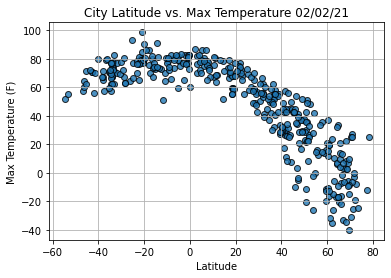

In [54]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

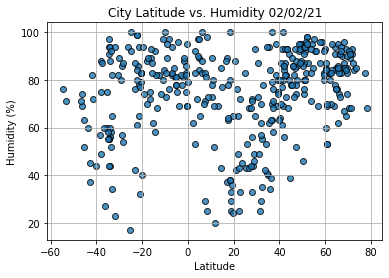

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

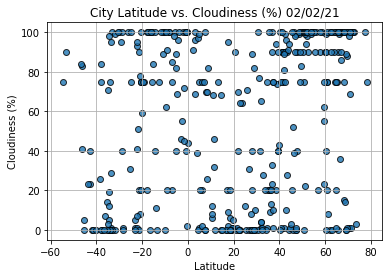

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

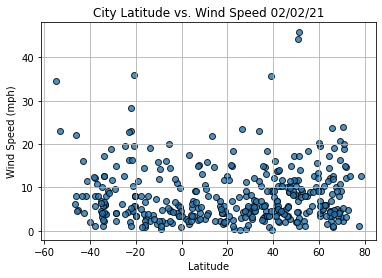

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()